In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
#import model
from model import Model_10
import matplotlib.pyplot as plt
import numpy as np
import dataset
import train
import utils


d:\Environment\ERA_V2\lib\site-packages\torch_lr_finder\lr_finder.py:5: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm


In [2]:
SEED = 1


cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)


torch.manual_seed(SEED)

if cuda:
    torch.cuda.manual_seed(SEED)

train_data = dataset.train()
test_data = dataset.test()
if cuda:
    batch_size = 512
    shuffle = True
    num_workers = 4
    pin_memory = True
    train_loader = dataset.get_train_loader(batch_size,shuffle,num_workers,pin_memory,train_data)
    test_loader = dataset.get_train_loader(batch_size,shuffle,num_workers,pin_memory,test_data)
else:
    batch_size =256
    shuffle = True
    num_workers =2
    pin_memory = True
    train_loader = dataset.get_train_loader(batch_size,shuffle,num_workers,pin_memory,train_data)
    test_loader = dataset.get_train_loader(batch_size,shuffle,num_workers,pin_memory,test_data)


CUDA Available? True
Files already downloaded and verified
Files already downloaded and verified


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


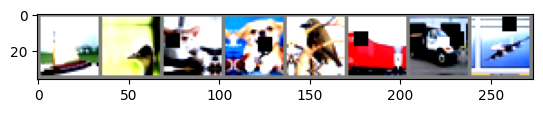

ship  bird  cat   dog  


In [3]:
# functions to show an image
utils.plot_image(train_loader)

In [4]:
device = utils.get_device()
model = Model_10().to(device)
utils.model_summary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
       BatchNorm2d-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
      BatchNorm2d-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128, 16, 16]               0
           Conv2d-14          [-1, 256,

 80%|████████  | 80/100 [00:29<00:07,  2.74it/s]

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


LR suggestion: steepest gradient
Suggested LR: 3.51E-04


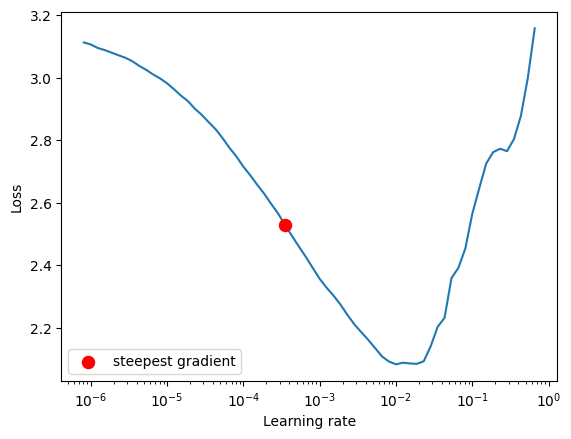

In [5]:
criterion = nn.CrossEntropyLoss()
max_lr, optimizer = utils.get_max_lr(model, train_loader,criterion)

In [7]:
from torch.optim.lr_scheduler import OneCycleLR

EPOCHS = 24
print(max_lr)
scheduler = OneCycleLR(
        optimizer,
        max_lr=max_lr,
        steps_per_epoch=len(train_loader),
        epochs=EPOCHS,
        pct_start=5/EPOCHS,
        div_factor=10,
        three_phase=False,
        final_div_factor=1,
        anneal_strategy='linear'
    )

for epoch in range(EPOCHS):
    print("EPOCH:", epoch)
    train_acc, train_losses = train.train(model, device, train_loader, optimizer, epoch, scheduler, criterion)
    test_acc, test_losses = train.test(model, device, test_loader, criterion)
    print(scheduler.get_last_lr())

0.000351119173421513
EPOCH: 0


Loss=0.48318758606910706 LR=9.84426148795285e-05 Batch_id=97 Accuracy=81.36: 100%|██████████| 98/98 [00:46<00:00,  2.13it/s]  



Test set: Average loss: 0.0010, Accuracy: 8248/10000 (82.48%)

[9.84426148795285e-05]
EPOCH: 1


Loss=0.510920524597168 LR=0.00016177331241690567 Batch_id=97 Accuracy=83.14: 100%|██████████| 98/98 [00:45<00:00,  2.14it/s]  



Test set: Average loss: 0.0012, Accuracy: 7977/10000 (79.77%)

[0.00016177331241690567]
EPOCH: 2


Loss=0.5251314043998718 LR=0.00022510400995428285 Batch_id=97 Accuracy=82.72: 100%|██████████| 98/98 [00:46<00:00,  2.12it/s] 



Test set: Average loss: 0.0010, Accuracy: 8250/10000 (82.50%)

[0.00022510400995428285]
EPOCH: 3


Loss=0.4784235656261444 LR=0.00028843470749166005 Batch_id=97 Accuracy=82.62: 100%|██████████| 98/98 [00:46<00:00,  2.09it/s] 



Test set: Average loss: 0.0011, Accuracy: 8082/10000 (80.82%)

[0.00028843470749166005]
EPOCH: 4


Loss=0.5571631789207458 LR=0.00035094945953532643 Batch_id=97 Accuracy=82.99: 100%|██████████| 98/98 [00:47<00:00,  2.08it/s] 



Test set: Average loss: 0.0015, Accuracy: 7461/10000 (74.61%)

[0.00035094945953532643]
EPOCH: 5


Loss=0.4276188313961029 LR=0.00033431749868904426 Batch_id=97 Accuracy=83.76: 100%|██████████| 98/98 [00:47<00:00,  2.06it/s] 



Test set: Average loss: 0.0011, Accuracy: 8093/10000 (80.93%)

[0.00033431749868904426]
EPOCH: 6


Loss=0.4880097806453705 LR=0.00031768553784276203 Batch_id=97 Accuracy=85.16: 100%|██████████| 98/98 [00:47<00:00,  2.04it/s] 



Test set: Average loss: 0.0011, Accuracy: 8222/10000 (82.22%)

[0.00031768553784276203]
EPOCH: 7


Loss=0.4190573990345001 LR=0.00030105357699647986 Batch_id=97 Accuracy=86.38: 100%|██████████| 98/98 [00:48<00:00,  2.01it/s] 



Test set: Average loss: 0.0009, Accuracy: 8491/10000 (84.91%)

[0.00030105357699647986]
EPOCH: 8


Loss=0.4148648977279663 LR=0.0002844216161501977 Batch_id=97 Accuracy=87.24: 100%|██████████| 98/98 [00:51<00:00,  1.91it/s]  



Test set: Average loss: 0.0011, Accuracy: 8186/10000 (81.86%)

[0.0002844216161501977]
EPOCH: 9


Loss=0.3591715395450592 LR=0.00026778965530391545 Batch_id=97 Accuracy=87.84: 100%|██████████| 98/98 [00:49<00:00,  1.99it/s] 



Test set: Average loss: 0.0009, Accuracy: 8555/10000 (85.55%)

[0.00026778965530391545]
EPOCH: 10


Loss=0.29033905267715454 LR=0.0002511576944576333 Batch_id=97 Accuracy=88.86: 100%|██████████| 98/98 [00:49<00:00,  1.98it/s] 



Test set: Average loss: 0.0009, Accuracy: 8454/10000 (84.54%)

[0.0002511576944576333]
EPOCH: 11


Loss=0.2994338274002075 LR=0.00023452573361135105 Batch_id=97 Accuracy=89.35: 100%|██████████| 98/98 [00:49<00:00,  1.98it/s] 



Test set: Average loss: 0.0008, Accuracy: 8615/10000 (86.15%)

[0.00023452573361135105]
EPOCH: 12


Loss=0.3147580921649933 LR=0.00021789377276506888 Batch_id=97 Accuracy=90.07: 100%|██████████| 98/98 [00:49<00:00,  1.97it/s] 



Test set: Average loss: 0.0008, Accuracy: 8610/10000 (86.10%)

[0.00021789377276506888]
EPOCH: 13


Loss=0.23039808869361877 LR=0.00020126181191878668 Batch_id=97 Accuracy=90.42: 100%|██████████| 98/98 [00:50<00:00,  1.94it/s]



Test set: Average loss: 0.0007, Accuracy: 8845/10000 (88.45%)

[0.00020126181191878668]
EPOCH: 14


Loss=0.3014712929725647 LR=0.0001846298510725045 Batch_id=97 Accuracy=91.11: 100%|██████████| 98/98 [00:50<00:00,  1.96it/s]  



Test set: Average loss: 0.0009, Accuracy: 8518/10000 (85.18%)

[0.0001846298510725045]
EPOCH: 15


Loss=0.2575872540473938 LR=0.0001679978902262223 Batch_id=97 Accuracy=91.75: 100%|██████████| 98/98 [00:50<00:00,  1.96it/s]  



Test set: Average loss: 0.0006, Accuracy: 8894/10000 (88.94%)

[0.0001679978902262223]
EPOCH: 16


Loss=0.23831124603748322 LR=0.0001513659293799401 Batch_id=97 Accuracy=92.01: 100%|██████████| 98/98 [00:49<00:00,  1.96it/s] 



Test set: Average loss: 0.0007, Accuracy: 8914/10000 (89.14%)

[0.0001513659293799401]
EPOCH: 17


Loss=0.19153881072998047 LR=0.0001347339685336579 Batch_id=97 Accuracy=92.96: 100%|██████████| 98/98 [01:46<00:00,  1.09s/it] 



Test set: Average loss: 0.0006, Accuracy: 8960/10000 (89.60%)

[0.0001347339685336579]
EPOCH: 18


Loss=0.23001761734485626 LR=0.00011810200768737572 Batch_id=97 Accuracy=93.68: 100%|██████████| 98/98 [07:52<00:00,  4.82s/it]



Test set: Average loss: 0.0007, Accuracy: 8868/10000 (88.68%)

[0.00011810200768737572]
EPOCH: 19


Loss=0.09626282006502151 LR=0.00010147004684109349 Batch_id=97 Accuracy=94.19: 100%|██████████| 98/98 [08:05<00:00,  4.95s/it]



Test set: Average loss: 0.0007, Accuracy: 8829/10000 (88.29%)

[0.00010147004684109349]
EPOCH: 20


Loss=0.1502484381198883 LR=8.483808599481132e-05 Batch_id=97 Accuracy=95.00: 100%|██████████| 98/98 [07:50<00:00,  4.80s/it] 



Test set: Average loss: 0.0006, Accuracy: 9076/10000 (90.76%)

[8.483808599481132e-05]
EPOCH: 21


Loss=0.11911973357200623 LR=6.820612514852909e-05 Batch_id=97 Accuracy=95.68: 100%|██████████| 98/98 [07:50<00:00,  4.80s/it]



Test set: Average loss: 0.0005, Accuracy: 9106/10000 (91.06%)

[6.820612514852909e-05]
EPOCH: 22


Loss=0.09809211641550064 LR=5.1574164302246915e-05 Batch_id=97 Accuracy=96.43: 100%|██████████| 98/98 [07:50<00:00,  4.80s/it]



Test set: Average loss: 0.0005, Accuracy: 9141/10000 (91.41%)

[5.1574164302246915e-05]
EPOCH: 23


Loss=0.08429129421710968 LR=3.494220345596474e-05 Batch_id=97 Accuracy=97.08: 100%|██████████| 98/98 [00:45<00:00,  2.17it/s] 



Test set: Average loss: 0.0005, Accuracy: 9179/10000 (91.79%)

[3.494220345596474e-05]


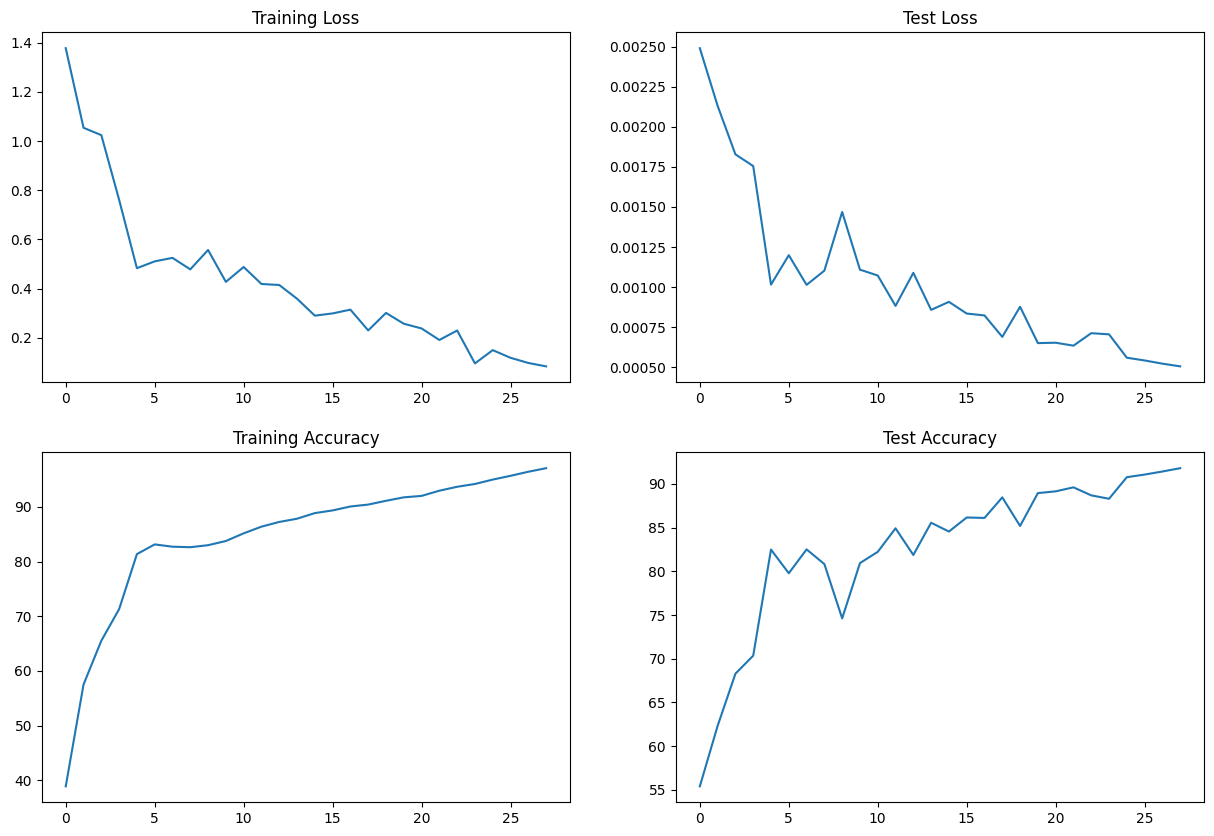

In [8]:
train.plot_loss_accuracy(train_losses,train_acc,test_losses,test_acc)

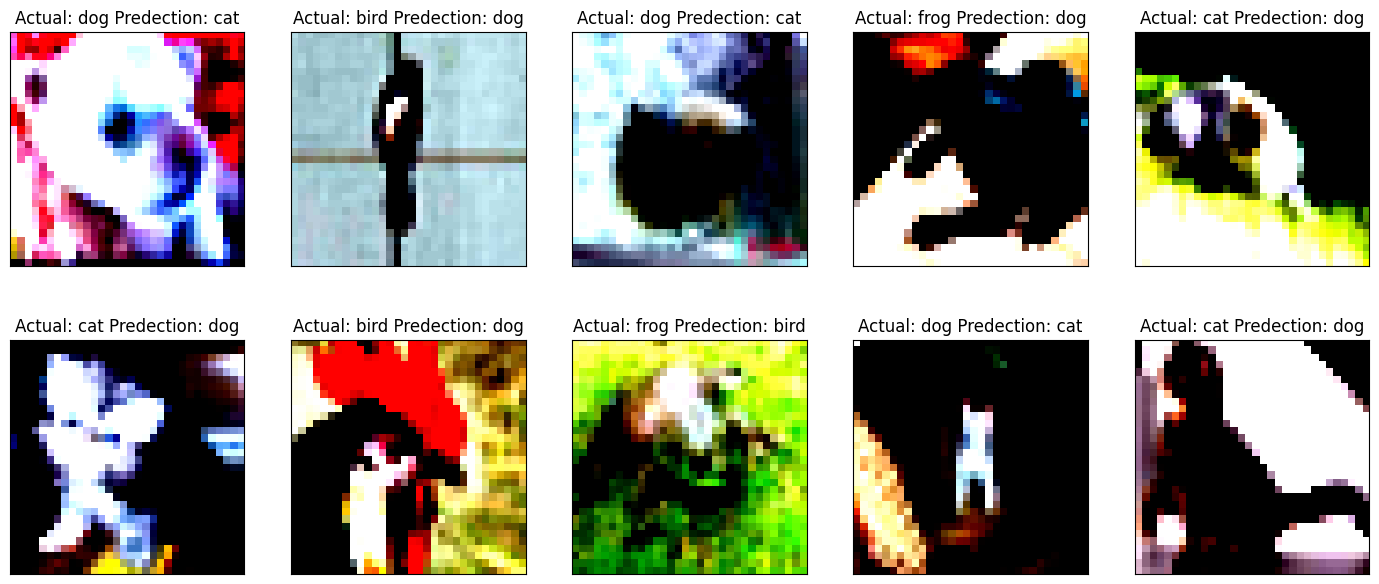

In [9]:
utils.plot_prediction_image(test_loader,device,model)